# Python Data Visualization

**Outline**

* [histogram](#histogram)
* [line](#line)
* [bar](#bar)
* [density](#density)
* [scatter](#scatter)

---

## <a id='histogram'>Histogram</a>

* [matplotlib doc](https://matplotlib.org/2.1.1/gallery/statistics/hist.html)
* [better example](https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html)
* [pandas histogram doc](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

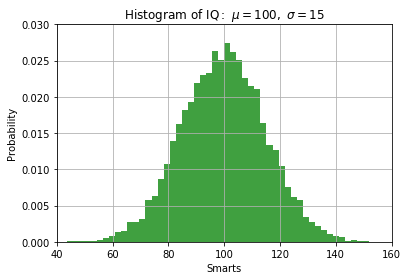

In [7]:
# create np.array data
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

> **Save Figure**

when running python script on cmd, rememer to `plt.close()` after each plot, otherwise it will have some errors.

In [ ]:
plt.savefig('jchiu_1.png')

> **Ploting using pandas series**

In [8]:
import pandas as pd

In [9]:
# create np.array data
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

In [10]:
mypd = pd.DataFrame({'A':x})

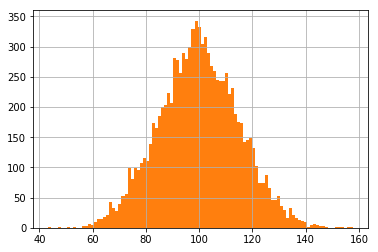

In [17]:
mypd['A'].hist(bins=100)
plt.show()

## <a id='line'>Line Chart</a>

* [link 1](https://medium.com/@mrpowers/working-with-dates-and-times-in-spark-491a9747a1d2)

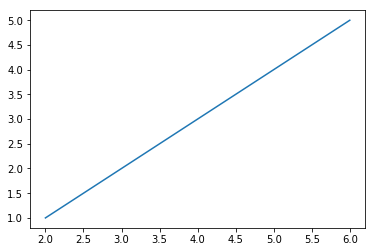

In [18]:
x = [2, 4, 6]
y = [1, 3, 5]
plt.plot(x, y)
plt.show()

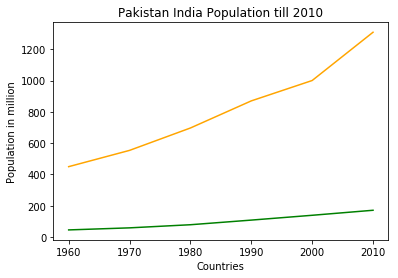

In [19]:
# data
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]

# plot
plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')

# add title
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')

# show
plt.show()

> **With Legend**

In [20]:
def plot_lines(name, value1, value2, legend, xlabel, ylabel, legend_title, title):
    """plot multiple line chart with legend"""
    
    fig, ax = plt.subplots(figsize=(20,10))
    x = np.arange(len(name))
    ax.plot(x, value1, label=legend[0]) #, color='g'
    ax.plot(x, value2, label=legend[1]) #, color='orange'

    # add legend
    ax.set_xticks(x)
    ax.set_xticklabels(name)
    ax.legend(title=legend_title)

    # add title and label
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid()

    # show
    plt.show()
    plt.close()     

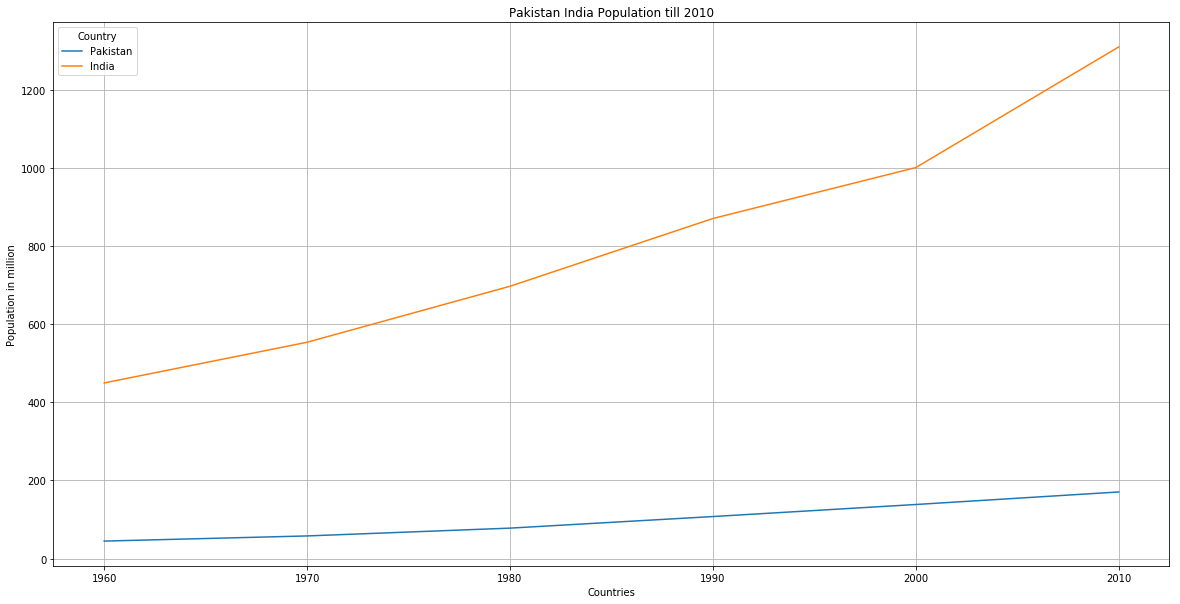

In [21]:
plot_lines(name=[1960, 1970, 1980, 1990, 2000, 2010], 
           value1=[44.91, 58.09, 78.07, 107.7, 138.5, 170.6], 
           value2=[449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1], 
           legend=['Pakistan','India'], 
           xlabel='Countries', 
           ylabel='Population in million', 
           legend_title="Country", 
           title='Pakistan India Population till 2010')

## <a id='bar'>Bar Chart</a>

> **Bar Chart**

* [Barchart with label](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)
* [Stacked Bar Graph](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)

In [ ]:
# def plot_bar_chart(name, value, xlabel, ylabel, title):
#     """both name and value are list"""
    
#     # plot
#     barWidth = 0.85
#     x = np.arange(0.9, len(name)) # specify the location of x ticks and then use .xticks to put on the actual category later
#     plt.bar(x, value, width=barWidth, color='#49639a')

#     # Custom x axis
# #     r = np.arange(0.9,len(name))   
#     plt.xticks(x, name)#,rotation=90
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)    
#     plt.title(title)    
#     # plt.ylim([0, 100])

#     # save graphic
#     plt.show()   
#     plt.close() 

In [22]:
def plot_bar_chart(name, value, xlabel, ylabel, title, bar_label = False):
    """both name and value are list"""
    
    # create fig and ax
    fig, ax = plt.subplots()#figsize=(20,10)
    x = np.arange(len(name))
    bar1 = ax.bar(x, value, color='#49639a')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(name)

    def autolabel(rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        xpos = xpos.lower()  # normalize the case of the parameter
        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                    '{}'.format(height), ha=ha[xpos], va='bottom')

    if bar_label:        
        autolabel(bar1, "center")
    
    # save graphic
    #plt.savefig('abc.png')
    plt.show()   
    plt.close() 

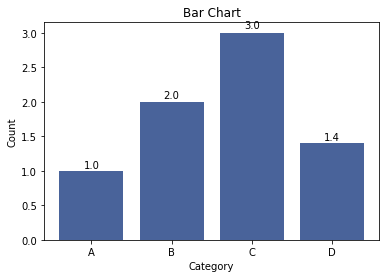

In [23]:
# Data
names = ['A','B','C','D']
list1 = [1,2,3,1.4]

plot_bar_chart(names, list1, 'Category', 'Count', 'Bar Chart', bar_label=True)

> **Stacked Bar Chart**

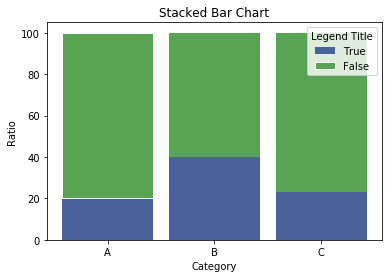

In [25]:
# Data
label_list = ['True','False']
names = ['A','B','C']
list1 = [1.0,2,3]
list2 = [4,3,10]
r = np.arange(0.9,len(list1))  

# From raw value to percentage
totals = [i+j for i,j in zip(list1, list2)]
Bars1 = [i / j * 100 for i,j in zip(list1, totals)]
Bars2 = [i / j * 100 for i,j in zip(list2, totals)]

# plot
barWidth = 0.85
plt.bar(r, Bars1, width=barWidth, label = str(label_list[0]), color='#49639a')
plt.bar(r, Bars2, bottom=Bars1,  edgecolor='white', width=barWidth, label = str(label_list[1]), color='#59a454')

# Custom x axis  
plt.xticks(r, names)
plt.xlabel('Category')
plt.ylabel('Ratio')    
plt.title('Stacked Bar Chart')    
plt.legend(title='Legend Title')
# plt.ylim([0, 100])

# save graphic
plt.show()   
plt.close()   

> **Stacked Bar Chart version2**

In [26]:
def plot_stacked_bar_chart(name, value1, value2, xlabel, ylabel, title, legend, bar_label = False):
    """both name and value are list"""
    
    # create fig and ax
    fig, ax = plt.subplots()#figsize=(20,10)
    x = np.arange(len(name))
    bar1 = ax.bar(x, value1)
    bar2 = ax.bar(x, value2, bottom=value1)  
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
#     plt.xticks(rotation=-30)
    ax.set_xticklabels(name)
    ax.legend((bar1[0], bar2[0]), legend)

    plt.show()   
    plt.close() 

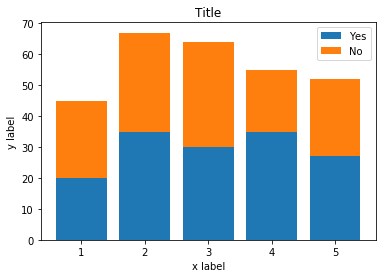

In [27]:
plot_stacked_bar_chart([1,2,3,4,5], 
                       [20, 35, 30, 35, 27],                        
                       [25, 32, 34, 20, 25],                       
                       'x label', 
                       'y label', 
                       'Title',
                       legend=['Yes','No'],
                       bar_label=False)

> **plot legend**

[Stack](https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib)

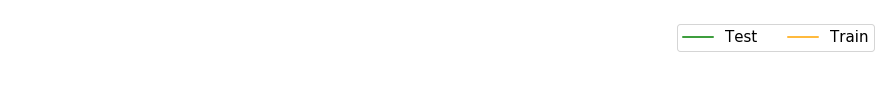

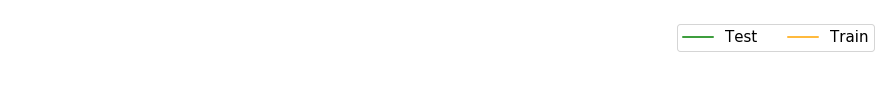

In [29]:
# plot legend on top
fig = plt.figure(figsize=(15, 1))
ax = fig.add_subplot(111)
ax.plot([], [], 'green', label='Test')
ax.plot([], [], 'orange', label='Train')
ax.legend(*ax.get_legend_handles_labels(), loc='right', prop={'size': 15}, ncol=2)
ax.axis('off')
ax.set_frame_on(False)
plt.show()

> **horizontal bar chart**

[stack](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def plot_horizontal_bar(df, title, xlabel, ylabel, in_percentage):
    """plot horizontal bar chart"""

    # better plotting format using seaborn
    sns.set_style("dark")
    sns.set_style("whitegrid")
    sns.set()

    # create fig and ax
    fig, ax = plt.subplots()

    # update value according to in_percentage or not
    name = df.iloc[:, 0]
    if in_percentage == True:
        value = df.iloc[:, 1] * 100
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        value = df.iloc[:, 1]

    # plot horizontal bar
    x = np.arange(len(name))
    ax.barh(x, value, color='#49639a')
    plt.yticks(x, name);

    # add title, x-y label
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # For each bar: Place a label
    rects = ax.patches
    for rect in rects:
        # Get X and Y placement of label from rect
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label
        space = 5

        # Use X value as label and reformat number
        if in_percentage == True:
            label = "{:.0f}%".format(x_value)
        else:
            label = "{:.2f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,  # Use `label` as label
            (x_value, y_value),  # Place label at end of the bar
            xytext=(space, 0),  # Horizontally shift label by `space`
            textcoords="offset points",  # Interpret `xytext` as offset in points
            va='center',
            fontweight="bold",
            fontsize=12)

In [95]:
df = pd.DataFrame({'category': ['A', 'B', 'C', 'D', 'E', 'F'],                       
                    'percentage': [1,2,3,4,6,3],                                  
                       })
df

,category,percentage
0,A,1
1,B,2
2,C,3
3,D,4
4,E,6
5,F,3


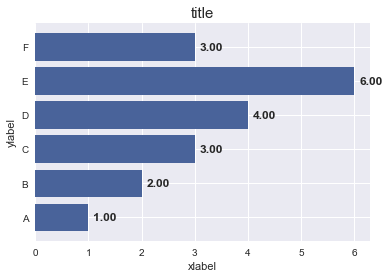

In [96]:
plot_horizontal_bar(df, 'title', 'xlabel', 'ylabel', in_percentage=False)

## <a id='density'>Density Plot</a>

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def prob_dist(df, col_name):
      
    plt.ylim([0,0.2])
    sns.distplot(df[df['bar'] == 'A'][col_name], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                      label = 'A')
    sns.distplot(df[df['bar'] == 'B'][col_name], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                      label = 'B')
    
    sns.set_style("whitegrid", {'axes.grid' : False})
    # Plot formatting
    plt.title(col_name + ' Probability Density Plot')
    plt.xlabel(col_name)
    plt.ylabel('Density')
#     plt.savefig('/content/drive/My Drive/2018 Fall/Humana-Healthcare-Comp/Final Reports/figures/prob_density_' + col_name +'.png')
    plt.show()

In [44]:
df = pd.DataFrame({'bar': ['A', 'B', 'A', 'A', 'B', 'A'],
                       'baz': [1, 2, 3, 4, 5, 6]})

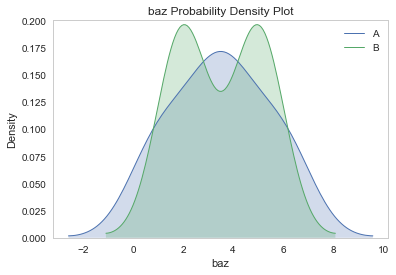

In [45]:
prob_dist(df, 'baz')

## <a id='scatter'>Scatter Plot</a>

In [4]:
import matplotlib.pyplot as plt

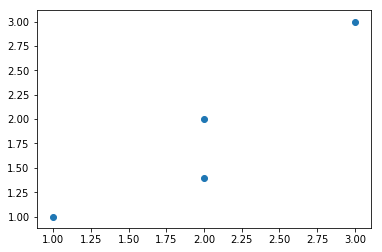

In [5]:
# Data
list1 = [1,2,3,2]
list2 = [1,2,3,1.4]

plt.scatter(list1, list2)#, s=area, c=colors, alpha=0.5
plt.show()